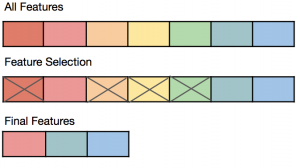

In [ ]:
!pip install mlxtend --quiet

In [ ]:
!pip install ipython-autotime --quiet
%load_ext autotime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00
time: 731 µs (started: 2025-02-12 22:26:31 +00:00)


# **Acceso al dataset**

Vamos a utilizar el dataset [California Housing](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

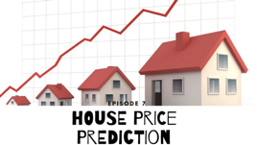

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

time: 3.45 s (started: 2025-02-12 22:26:31 +00:00)


In [ ]:
#url1 = "https://raw.githubusercontent.com/subhadipml/California-Housing-Price-Prediction/master/housing.csv"
url2 = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_df = pd.read_csv(url2)
# housing_df = housing_df.drop('ocean_proximity', axis=1)
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

time: 666 ms (started: 2025-02-12 22:26:35 +00:00)


In [ ]:
# Corregimos campos NaN
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace=True) # Se aplica directo sobre el dataframe

time: 10.8 ms (started: 2025-02-12 22:26:35 +00:00)


<ipython-input-5-a8847ac1aacd>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_df["total_bedrooms"].fillna(median, inplace=True) # Se aplica directo sobre el dataframe


(array([  36.,  841., 1628., 1984., 1878., 2221., 2153., 1618., 1591.,
        1208., 1075.,  694.,  567.,  672.,  435.,  317.,  244.,  235.,
         144., 1099.]),
 array([ 14999. ,  39249.1,  63499.2,  87749.3, 111999.4, 136249.5,
        160499.6, 184749.7, 208999.8, 233249.9, 257500. , 281750.1,
        306000.2, 330250.3, 354500.4, 378750.5, 403000.6, 427250.7,
        451500.8, 475750.9, 500001. ]),
 <BarContainer object of 20 artists>)

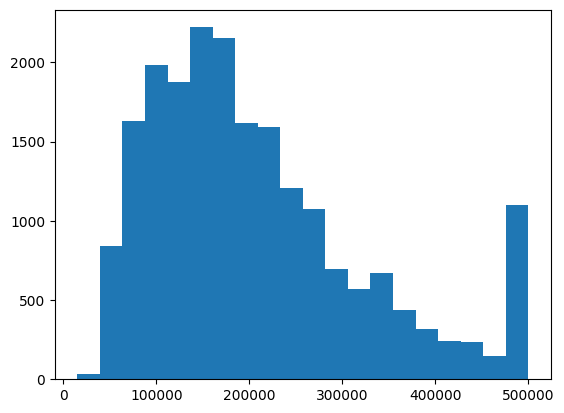

time: 375 ms (started: 2025-02-12 22:26:35 +00:00)


In [ ]:
plt.hist(housing_df['median_house_value'], bins=20)

Graficamos las correlaciones entre features y respecto a la variable a predecir (median_house_value). Para una mejor visualizacion, vamos a usar una discretizacion de la variable a predecir.

In [ ]:
X = housing_df.drop('median_house_value', axis=1)
y = housing_df['median_house_value'].copy() # Reservamos el valor original (para luego de la visualizacion)
#pd.qcut(housing_df['median_house_value'], q=3)
pd.cut(housing_df['median_house_value'], bins=3)

0         (338333.667, 500001.0]
1         (338333.667, 500001.0]
2         (338333.667, 500001.0]
3         (338333.667, 500001.0]
4         (338333.667, 500001.0]
                  ...           
20635    (14513.998, 176666.333]
20636    (14513.998, 176666.333]
20637    (14513.998, 176666.333]
20638    (14513.998, 176666.333]
20639    (14513.998, 176666.333]
Name: median_house_value, Length: 20640, dtype: category
Categories (3, interval[float64, right]): [(14513.998, 176666.333] < (176666.333, 338333.667] <
                                           (338333.667, 500001.0]]

time: 35.7 ms (started: 2025-02-12 22:26:36 +00:00)


In [ ]:
# Discretizamos en 3 partes (o bien en base a cuartiles) y aplicamos etiquetas para cada uno.
house_labels = ['low', 'average', 'high']
#housing_df['median_house_value'] = pd.qcut(housing_df['median_house_value'], labels=house_labels, q=3)
housing_df['median_house_value'] = pd.cut(housing_df['median_house_value'], labels=house_labels, bins=3)
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income median_house_value ocean_proximity  
0       322.0       126.0         8.3252               high        NEAR BAY  
1      2401.0      1138.0         8.3014               high        NEAR BAY  
2       496.0       177.0         7.2574               high        NEAR BAY  
3       558.0       219.0         5.6431               high        NEAR BAY  
4       565.0       259.0         3.8462               high        NEAR BAY

time: 111 ms (started: 2025-02-12 22:26:36 +00:00)


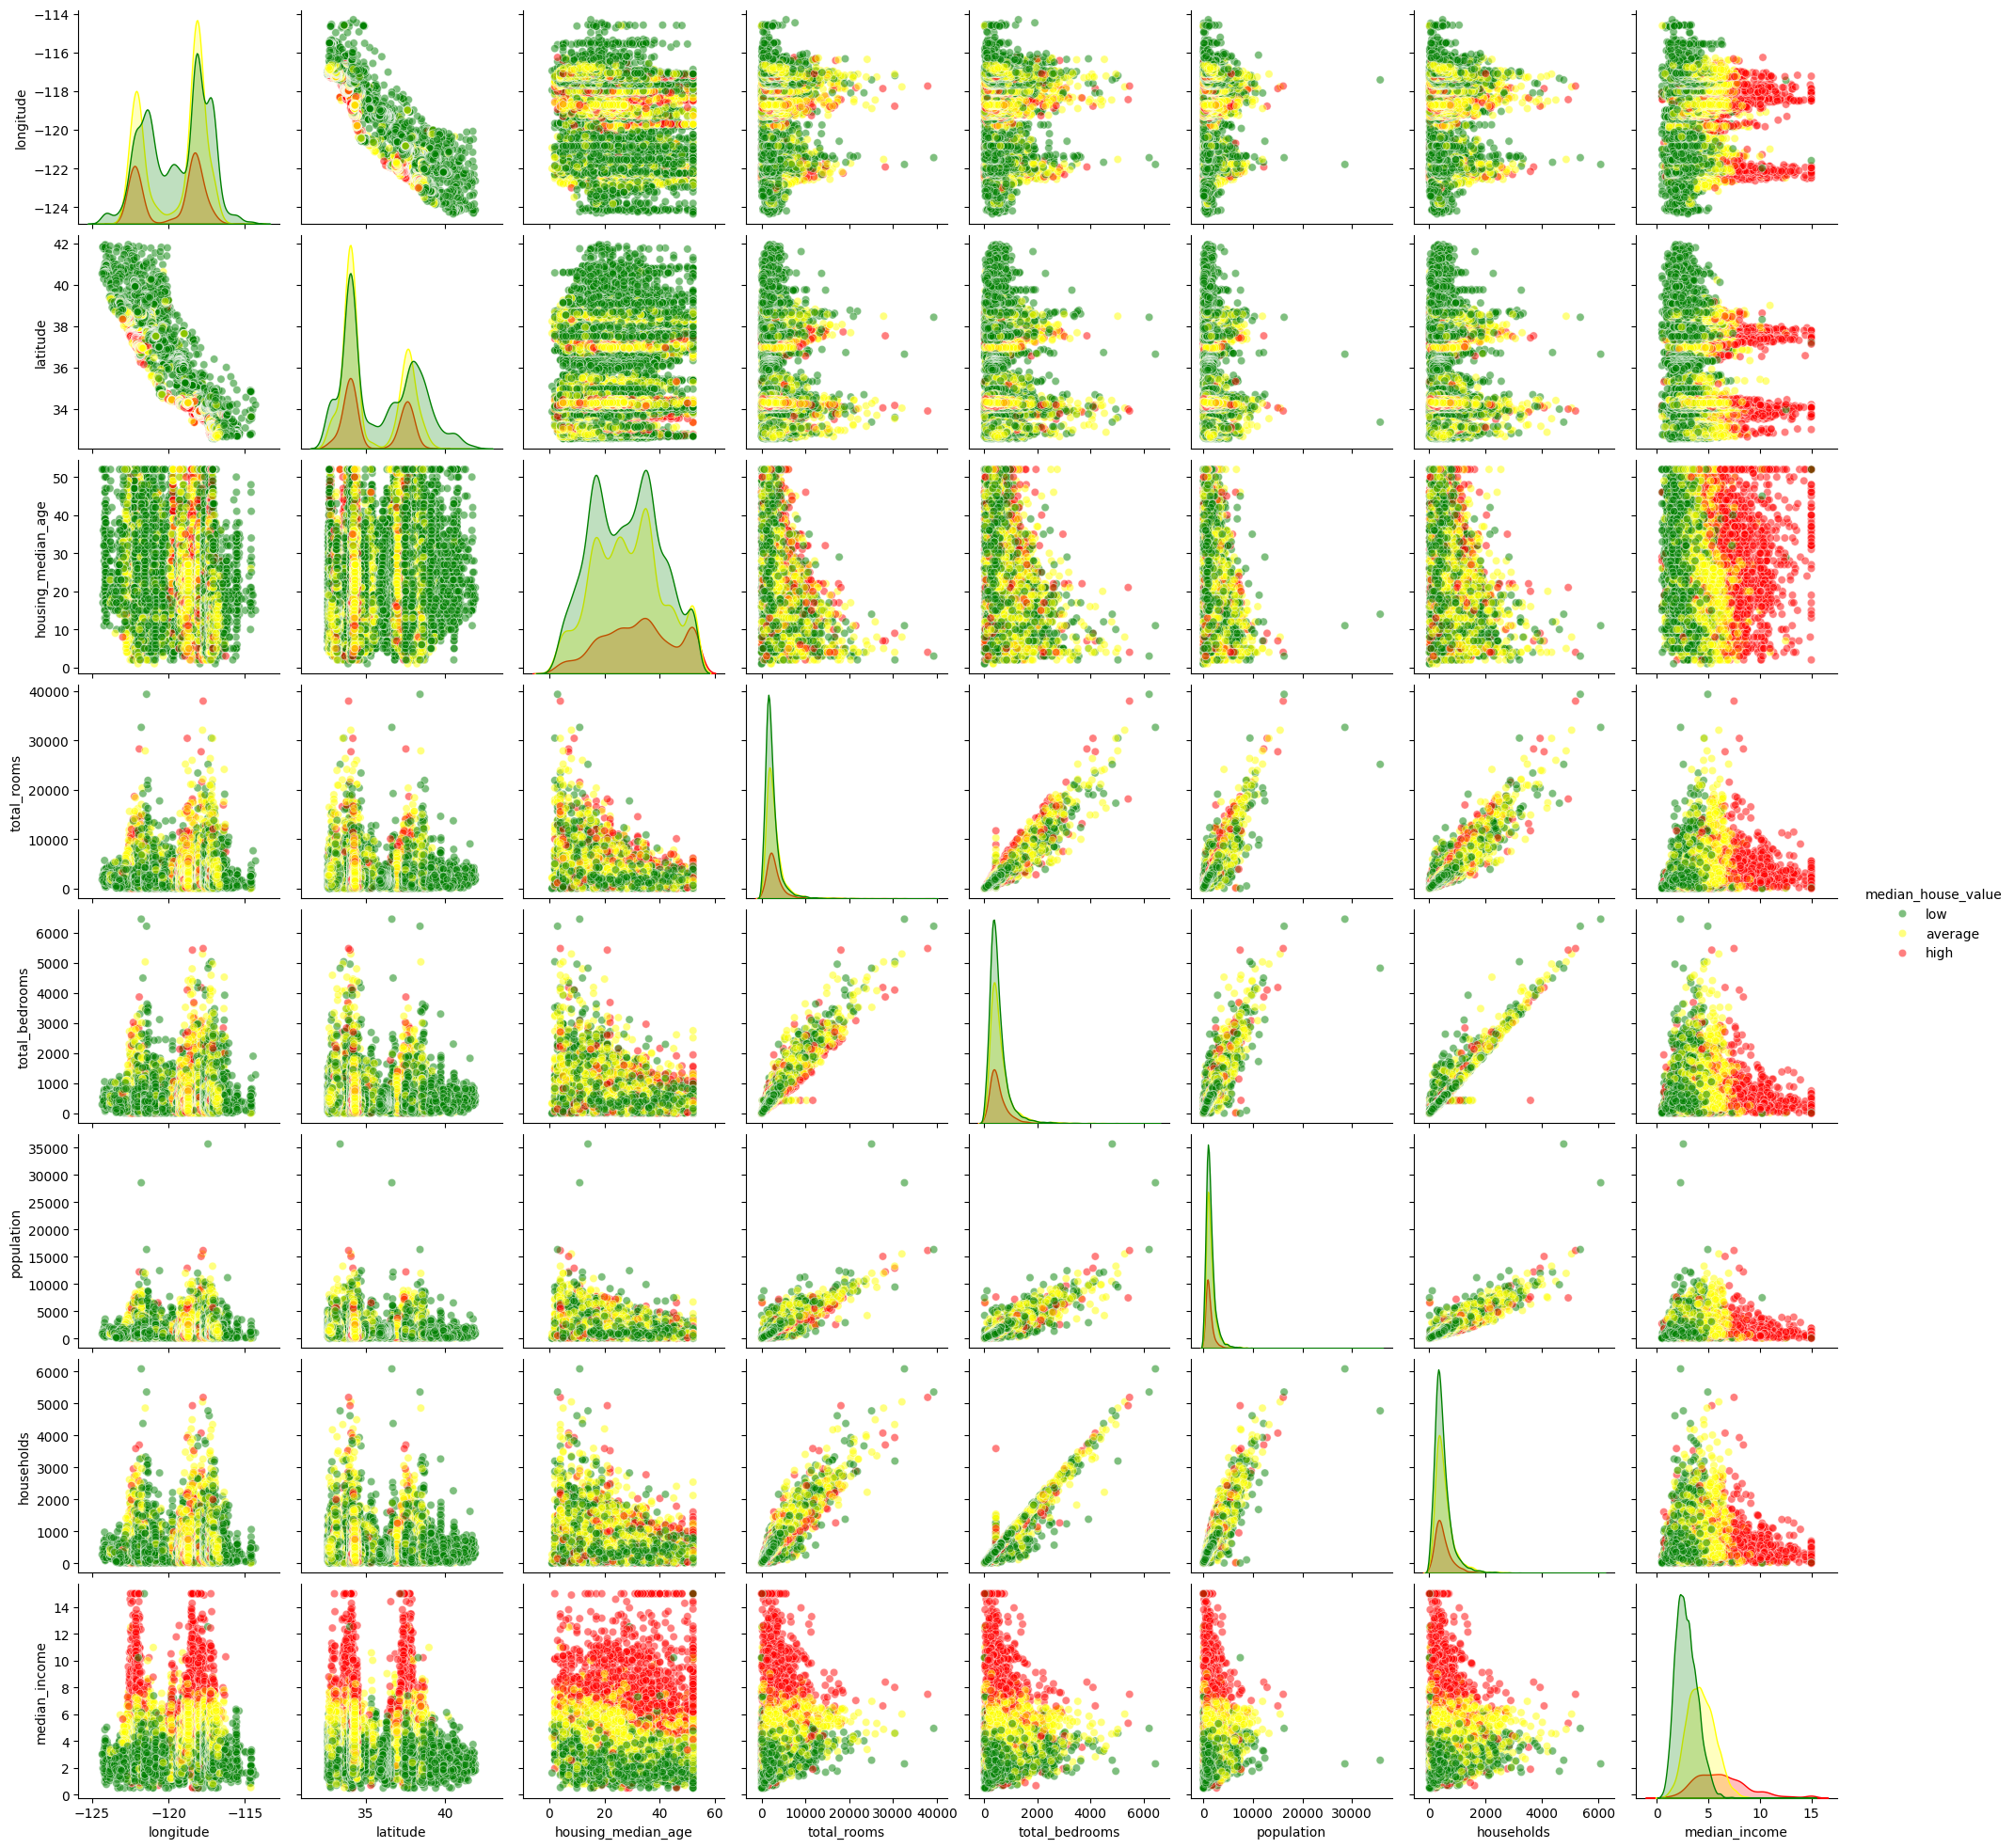

time: 2min 2s (started: 2025-02-12 22:26:36 +00:00)


In [ ]:
sns.pairplot(housing_df, hue='median_house_value', palette=['green','yellow','red'], kind='scatter', plot_kws={'alpha':0.5}) # It takes a while to compute!
plt.show()

Se pueden estudiar las correlaciones (Pearson) entre los features y las clases.

In [ ]:
housing_df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income median_house_value  \
0           322.0       126.0         8.3252               high   
1          2401.0      1138.0         8.3014               high   
2           496.0       177.0         7.2574               high   
3           558.0       219.0         5.6431               high   
4           565.0       259.0         3.8462               high   
...           ...         ...            ...                ...   
20635       845.0       330.0         1.5603                low   
20636       356.0       114.0         2.5568                low   
20637      1007.0       433.0         1.7000                low   
20638       741.0       349.0         1.8672                low   
20639      1387.0       530.0         2.3886                low   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

time: 66 ms (started: 2025-02-12 22:28:39 +00:00)


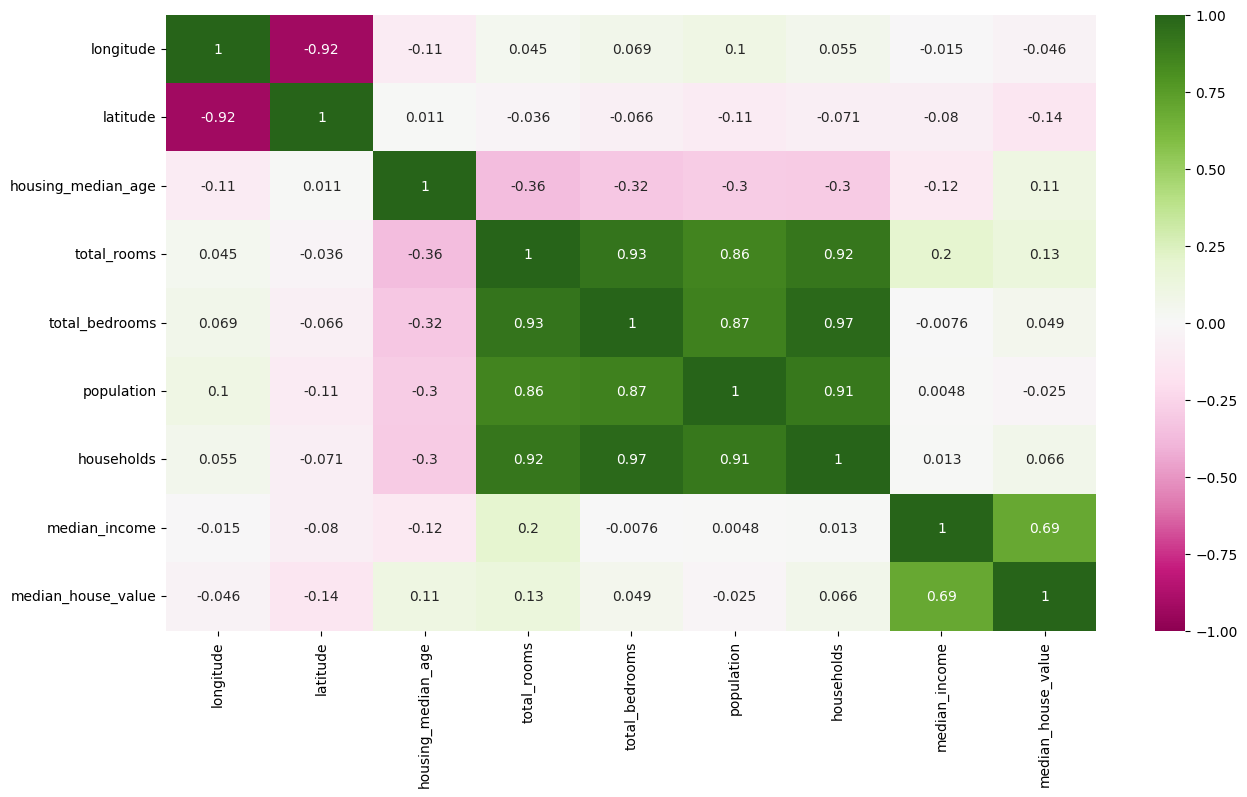

time: 640 ms (started: 2025-02-12 22:28:39 +00:00)


In [ ]:
housing_df = housing_df.drop("ocean_proximity", axis=1)
housing_df['median_house_value'] = y
housing_corr = housing_df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(housing_corr, annot=True, vmin=-1, vmax=1, cmap="PiYG") # Divergent palette
plt.show()



---


# **Feature Selection**

Algunos de los posibles beneficios incluyen:

* Reducción del tiempo de entrenamiento
* Menor riesgo de overfitting
* Posible incremento en la performance del modelo
* Reducción de la complejidad del modelo, a fin de facilitar su interpretación (por un humano)

Vamos a ver 2 tipos de metodos:

* Filter
* Wrapper


## **Metodos de Filtrado**

Un primer enfoque es seleccionar los mejores k features usando un **método de filtrado**. Esto es independiente de la técnica de ML a utilizar. Este método es útil como una forma de pre-procesado y es rápido en términos de computación, pero no considera las relaciones de un feature con otros features.

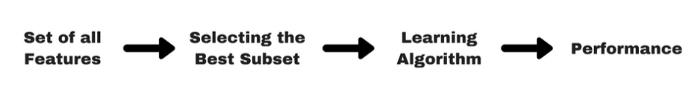

Usamos un test **ANOVA F-value** ([F-statistic](https://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/)) para hacer un ranking de los features. ANOVA sirve para analisis de varianza que permite comparar multiples muestras para chequear su independencia. En el caso de variables numericas, se usa el **coeficiente de correlacion de Pearson**.

In [ ]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

time: 3.37 ms (started: 2025-02-12 22:28:40 +00:00)


In [ ]:
# from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
y = housing_df['median_house_value']
# X = housing_df.drop(['median_house_value', 'ocean_proximity'], axis=1)
X = housing_df.drop(['median_house_value'], axis=1)

f_value = f_classif(X, y)
# Imprime el valor del F-value (mayor valor significa mas significativo)
for feature in zip(X.columns, f_value[0]):
    print(feature)

('longitude', 1.0565325815400513)
('latitude', 1.2595112498535563)
('housing_median_age', 1.1151778849207261)
('total_rooms', 1.5544587279221602)
('total_bedrooms', 1.1482600011541353)
('population', 1.1963203928318336)
('households', 1.2040328060917163)
('median_income', 6.80719001040634)
time: 1.54 s (started: 2025-02-12 22:28:40 +00:00)


Otra métrica es **Mutual Information (MI)**, que mide la dependencia de una variable con otra cuantificando la cantidad de información obtenida de un feature a través del otro feature. MI es simétrica y no negativa, y es 0 solamente si los features son independientes. A diferencia de ANOVA F-value, MI puede capturar relaciones no lineales entre los features.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
y = housing_df['median_house_value']
# X = housing_df.drop(['median_house_value', 'ocean_proximity'], axis=1)
X = housing_df.drop(['median_house_value'], axis=1)
mi_score = mutual_info_classif(X, y, random_state=0)

# Imprime el valor del mi_score (mayor valor significa mas significativo)
for feature in zip(X.columns, mi_score):
    print(feature)

('longitude', 0.1511449218030556)
('latitude', 0.14272942007635692)
('housing_median_age', 0.043847025725018085)
('total_rooms', 0.09440660013601487)
('total_bedrooms', 0.06052024512210963)
('population', 0.06441375454701515)
('households', 0.06708155221199341)
('median_income', 0.4273565446872283)
time: 23.2 s (started: 2025-02-12 22:28:41 +00:00)


Veamos una grafica comparativa de las 2 alternativas de seleccion de features.

<ipython-input-15-f7be974fac42>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(feature_names, rotation=90)
<ipython-input-15-f7be974fac42>:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(feature_names, rotation=90)


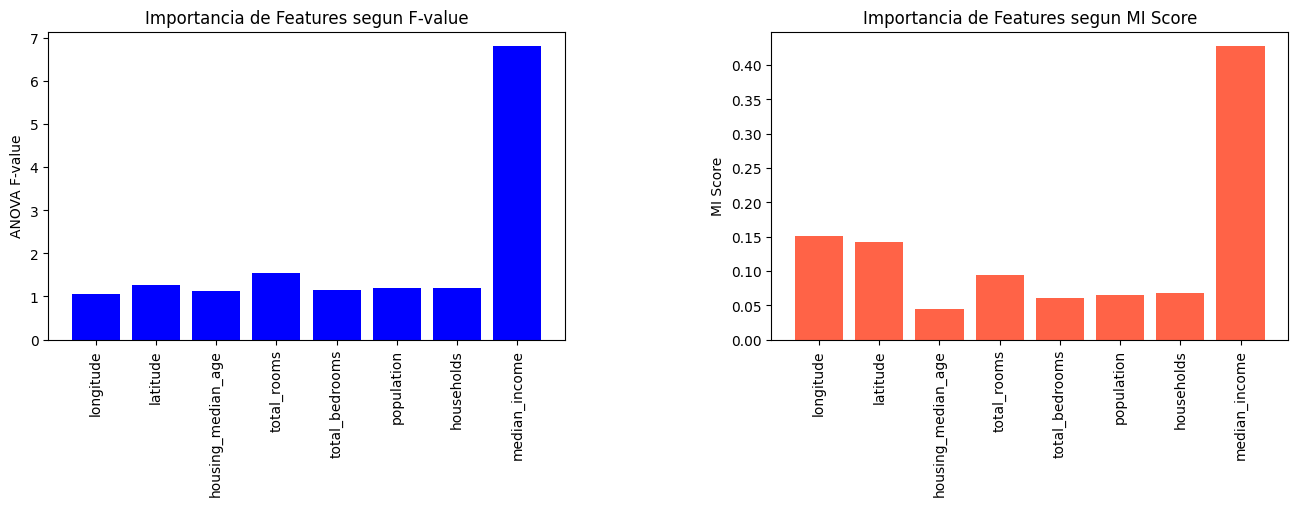

time: 348 ms (started: 2025-02-12 22:29:05 +00:00)


In [ ]:
import matplotlib.pyplot as plt

feature_names = X.columns

fig = plt.figure(figsize=(16,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# ANOVA F-value
ax = fig.add_subplot(1, 2, 1)
ax.bar(x=feature_names, height=f_value[0], color='blue')
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel("ANOVA F-value")
ax.set_title('Importancia de Features segun F-value')

# Mutual information (MI)
ax = fig.add_subplot(1, 2, 2)
ax.bar(x=feature_names, height=mi_score, color='tomato')
ax.set_xticklabels(feature_names, rotation=90)
ax.set_ylabel("MI Score")
ax.set_title('Importancia de Features segun MI Score')

plt.show()

Otras alternativas pueden ser el estadistico **Chi2** o **VarianceThreshold**.

In [ ]:
from sklearn.feature_selection import SelectKBest

# Selecciona los 3 mejores features
bestfeatures = SelectKBest(score_func=mutual_info_regression, k=3)
#bestfeatures = SelectKBest(score_func=f_regression, k=3)
housing_trim = bestfeatures.fit_transform(X, y)

print("Scores: ", bestfeatures.scores_)
print("p-values:", bestfeatures.pvalues_)
print("Dataset size:", housing_trim.shape)

mask = bestfeatures.get_support()
new_features = X.columns[mask]
print("Features seleccionados", new_features)

Scores:  [0.40025682 0.37284228 0.03308533 0.04209149 0.02487921 0.02103343
 0.02891819 0.38676127]
p-values: None
Dataset size: (20640, 3)
Features seleccionados Index(['longitude', 'latitude', 'median_income'], dtype='object')
time: 1.13 s (started: 2025-02-12 22:29:05 +00:00)


### **Validacion del modelo de regresion**

Veamos la performance una regresion lineal con todos los features (8) versus los mejores (4) features

In [ ]:
import statsmodels.api as sm

# El modelo original
X1 = sm.add_constant(X)
model1 = sm.OLS(y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     4498.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:29:08   Log-Likelihood:            -2.5945e+05
No. Observations:               20640   AIC:                         5.189e+05
Df Residuals:                   20631   BIC:                         5.190e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -3.57e+06   6.26

In [ ]:
# El modelo reducido
X2 = housing_df[new_features]
X2 = sm.add_constant(X2)
model2 = sm.OLS(y, X2).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     9667.
Date:                Wed, 12 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:29:08   Log-Likelihood:            -2.6081e+05
No. Observations:               20640   AIC:                         5.216e+05
Df Residuals:                   20636   BIC:                         5.217e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.173e+06   6.21e+04    -67.170

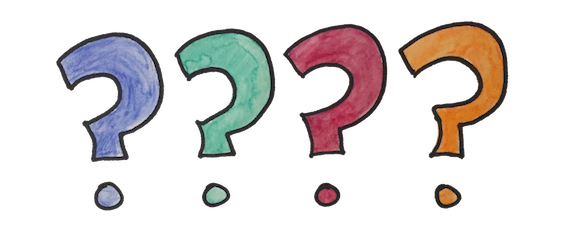

## **Métodos de Wrapper**

Este método permite la detección de relaciones entre los features, evaluando distintas combinaciones de features y buscando en forma greedy aquellas que llevan a una mejor performance un modelo de ML. Este metodo puede ser mas costoso en términos de computación (especialmente si el número de features es grande). También hay un riesgo de overfitting, si el número de instancias en el dataset es insuficiente.

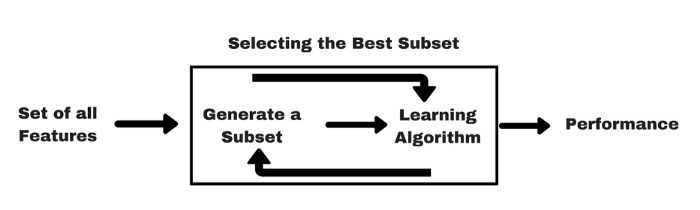

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

time: 809 µs (started: 2025-02-12 22:29:08 +00:00)


In [ ]:
from sklearn.linear_model import LinearRegression

# El modelo basico a evaluar con las diferentes estrategias
model = LinearRegression()
model.fit(X, y)

LinearRegression()

time: 40.6 ms (started: 2025-02-12 22:29:08 +00:00)


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(estimator=model,
          min_features=1,     # The minimum number of features to consider is 1
          max_features=4,     # The maximum number of features to consider is 4
          scoring='r2',       # The metric to use to evaluate the regressor is R2
          cv=5)               # The number of cross-validations to perform is 5

# Entrenamos EFS
efs = efs.fit(X, y)

print('Mejor R2: %.2f' % efs.best_score_)
print('Mejor subconjunto (indices):', efs.best_idx_)
print('Mejor subconjunto (features):', efs.best_feature_names_)

Features: 162/162

Mejor R2: 0.54
Mejor subconjunto (indices): (0, 1, 2, 7)
Mejor subconjunto (features): ('longitude', 'latitude', 'housing_median_age', 'median_income')
time: 8.01 s (started: 2025-02-12 22:29:08 +00:00)


In [ ]:
# Transformacion del dataset
X_trim = efs.transform(X)

print('Features antes de la transformacion: {}'.format(X.shape))
print('Features luego de la transformacion: {}'.format(X_trim.shape))

Features antes de la transformacion: (20640, 8)
Features luego de la transformacion: (20640, 4)
time: 3.23 ms (started: 2025-02-12 22:29:16 +00:00)


Analizamos los valores de performance con EFS.

In [ ]:
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=False, inplace=True)
print("Combinaciones posibles: ", efs_results.shape[0])
efs_results.head(10)

Combinaciones posibles:  162


feature_idx                                          cv_scores  \
96   (0, 1, 2, 7)  [0.5562912113500227, 0.44778678346396583, 0.53...   
103  (0, 1, 4, 7)  [0.575501037527093, 0.43794567022248987, 0.531...   
106  (0, 1, 6, 7)  [0.5737284191595998, 0.43577634978572355, 0.52...   
105  (0, 1, 5, 7)  [0.5639702398124955, 0.42972247905832717, 0.53...   
41      (0, 1, 7)  [0.5689950459963609, 0.4308793536013441, 0.534...   
100  (0, 1, 3, 7)  [0.5704045773590699, 0.43163422279620245, 0.53...   
156  (2, 5, 6, 7)  [0.5080011466644087, 0.45969932178476114, 0.52...   
149  (2, 3, 4, 7)  [0.5390587130045835, 0.4550356893540186, 0.504...   
154  (2, 4, 5, 7)  [0.5066887234649634, 0.4478425720157925, 0.513...   
152  (2, 3, 6, 7)  [0.5316071343067397, 0.4487454941615996, 0.487...   

    avg_score                                      feature_names  ci_bound  \
96   0.544775  (longitude, latitude, housing_median_age, medi...  0.093808   
103  0.535178  (longitude, latitude, total_bedrooms, median_i...  0.099031   
106  0.533907   (longitude, latitude, households, median_income)  0.100036   
105   0.53364   (longitude, latitude, population, median_income)  0.101188   
41   0.533119               (longitude, latitude, median_income)  0.100915   
100  0.532752  (longitude, latitude, total_rooms, median_income)  0.101068   
156  0.502714  (housing_median_age, population, households, m...  0.059847   
149  0.500173  (housing_median_age, total_rooms, total_bedroo...  0.053835   
154  0.493219  (housing_median_age, total_bedrooms, populatio...  0.059316   
152  0.492347  (housing_median_age, total_rooms, households, ...  0.060202   

      std_dev   std_err  
96   0.072986  0.036493  
103  0.077049  0.038525  
106  0.077832  0.038916  
105  0.078728  0.039364  
41   0.078515  0.039258  
100  0.078634  0.039317  
156  0.046563  0.023281  
149  0.041886  0.020943  
154   0.04615  0.023075  
152   0.04684   0.02342

time: 304 ms (started: 2025-02-12 22:29:16 +00:00)


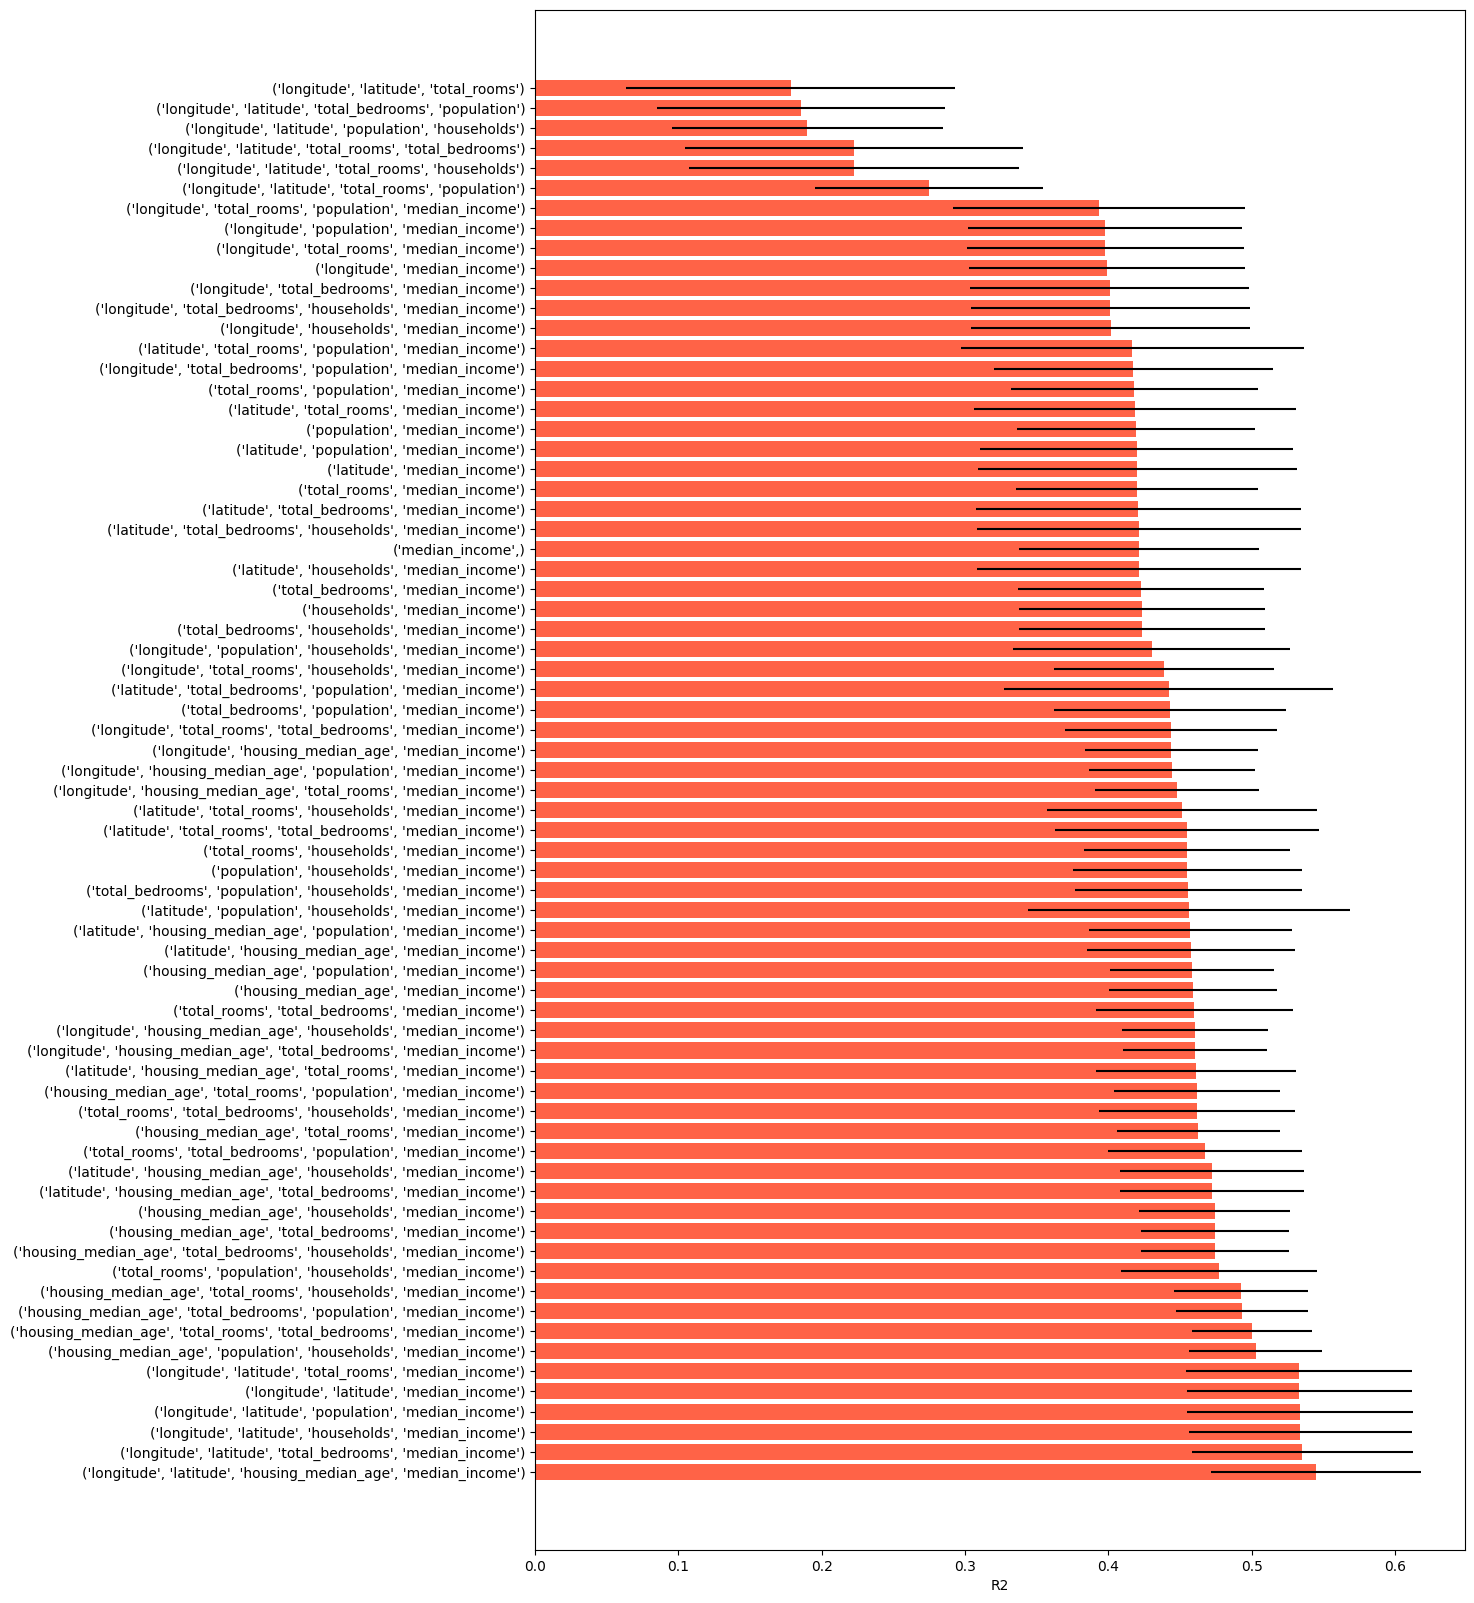

time: 979 ms (started: 2025-02-12 22:29:16 +00:00)


In [ ]:
# Bar chart
efs_results = efs_results[:70] # Top-70 combinations

fig, ax = plt.subplots(figsize=(12,20))
y_pos = np.arange(len(efs_results))
ax.barh(y_pos, efs_results['avg_score'], xerr=efs_results['std_dev'], color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(efs_results['feature_names'])
ax.set_xlabel('R2')
plt.show()

La estrategia **forward** evalua la performance del clasificador con respecto a cada feature, y se selecciona el mejor feature. Luego, el primer feature seleccionado se prueba en combinación con los restantes features, y se selecciona el par de features que conduce a la mejor performance. El proceso continua hasta que se selecciona un número de features predeterminado.

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(estimator=model,
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='r2',       # The metric to use to evaluate the classifier is accuracy
          cv=5)               # The number of cross-validations to perform is 5

# Entrenamos SFS con el dataset
sfs = sfs.fit(X, y)

print('Mejor R2: %.2f' % sfs.k_score_)
print('Mejor subconjunto (indices):', sfs.k_feature_idx_)
print('Mejor subconjunto (features):', sfs.k_feature_names_)

Mejor R2: 0.50
Mejor subconjunto (indices): (2, 3, 4, 7)
Mejor subconjunto (features): ('housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income')
time: 832 ms (started: 2025-02-12 22:29:17 +00:00)


In [ ]:
# Transformamos el dataset
X_trim = sfs.transform(X)

print('Features antes de la transformacion: {}'.format(X.shape))
print('Features despues de la transformacion: {}'.format(X_trim.shape))

Features antes de la transformacion: (20640, 8)
Features despues de la transformacion: (20640, 4)
time: 4.28 ms (started: 2025-02-12 22:29:18 +00:00)


Analizamos los valores de performance con SFS, para cada uno de los subconjuntos de features.

In [ ]:
sfs_results = pd.DataFrame.from_dict(sfs.subsets_).T
sfs_results

feature_idx                                          cv_scores avg_score  \
1          (7,)  [0.4645838932053591, 0.35374042999172006, 0.46...  0.421397   
2        (2, 7)  [0.4763911866240975, 0.3869912980836966, 0.487...  0.458686   
3     (2, 4, 7)  [0.5078215598183297, 0.41751082079984647, 0.48...  0.474202   
4  (2, 3, 4, 7)  [0.5390587130045835, 0.4550356893540186, 0.504...  0.500173   

                                       feature_names  
1                                   (median_income,)  
2                (housing_median_age, median_income)  
3  (housing_median_age, total_bedrooms, median_in...  
4  (housing_median_age, total_rooms, total_bedroo...

time: 34.1 ms (started: 2025-02-12 22:29:18 +00:00)


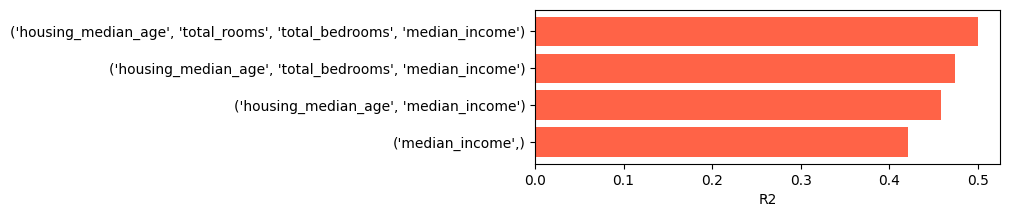

time: 162 ms (started: 2025-02-12 22:29:18 +00:00)


In [ ]:
# Bar chart
fig, ax = plt.subplots(figsize=(6,2))
y_pos = np.arange(len(sfs_results))
ax.barh(y_pos, sfs_results['avg_score'], color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sfs_results['feature_names'])
ax.set_xlabel('R2')
plt.show()

A diferencia de la estrategia forward, la estrategia **backward** funciona en orden inverso: en primer luegar selecciona todos los features y prueba de remover de a uno de ellos, analizando su efecto en la performance del modelo de ML. Se retiene el subconjunto que produce la mejor performance. Luego, se realiza el mismo procedimiento sobre el subconjunto seleccionado, y así hasta llegar al número mínimo de features especificado.



In [ ]:
sbs = SFS(estimator=model,
          k_features=(1, 4),  # Consider any feature combination between 1 and 4
          forward=False,      # Set forward to False when we want to perform SBS
          scoring='r2', # The metric to use to evaluate the classifier is accuracy
          cv=5)               # The number of cross-validations to perform is 5

sbs = sbs.fit(X, y)

print('Mejor R2: %.2f' % sbs.k_score_)
print('Mejor subconjunto (indices):', sbs.k_feature_idx_)
print('Mejor subconjunto (features):', sbs.k_feature_names_)

Mejor R2: 0.54
Mejor subconjunto (indices): (0, 1, 4, 7)
Mejor subconjunto (features): ('longitude', 'latitude', 'total_bedrooms', 'median_income')
time: 2.04 s (started: 2025-02-12 22:29:19 +00:00)


In [ ]:
# Transformamos el dataset
X_trim = sbs.transform(X)

print('Features antes de la transformacion: {}'.format(X.shape))
print('Features despues de la transformacion: {}'.format(X_trim.shape))

Features antes de la transformacion: (20640, 8)
Features despues de la transformacion: (20640, 4)
time: 2.39 ms (started: 2025-02-12 22:29:21 +00:00)


Analizamos los valores de performance con SBS, para cada uno de los subconjuntos de features.

In [ ]:
sbs_results = pd.DataFrame.from_dict(sbs.subsets_).T
sbs_results

feature_idx  \
8  (0, 1, 2, 3, 4, 5, 6, 7)   
7     (0, 1, 2, 3, 4, 5, 7)   
6        (0, 1, 2, 4, 5, 7)   
5           (0, 1, 4, 5, 7)   
4              (0, 1, 4, 7)   
3                 (0, 1, 7)   
2                    (1, 7)   
1                      (7,)   

                                           cv_scores avg_score  \
8  [0.5842666393309094, 0.5233978084038424, 0.583...  0.584949   
7  [0.5825341161004951, 0.5170568213679299, 0.582...  0.582829   
6  [0.5791217467168135, 0.5122386359297253, 0.581...  0.580576   
5  [0.589214179213505, 0.47924575106143863, 0.581...  0.563673   
4  [0.575501037527093, 0.43794567022248987, 0.531...  0.535178   
3  [0.5689950459963609, 0.4308793536013441, 0.534...  0.533119   
2  [0.49858343498247126, 0.3850007963912808, 0.47...  0.419996   
1  [0.4645838932053591, 0.35374042999172006, 0.46...  0.421397   

                                       feature_names  
8  (longitude, latitude, housing_median_age, tota...  
7  (longitude, latitude, housing_median_age, tota...  
6  (longitude, latitude, housing_median_age, tota...  
5  (longitude, latitude, total_bedrooms, populati...  
4  (longitude, latitude, total_bedrooms, median_i...  
3               (longitude, latitude, median_income)  
2                          (latitude, median_income)  
1                                   (median_income,)

time: 20.2 ms (started: 2025-02-12 22:29:21 +00:00)


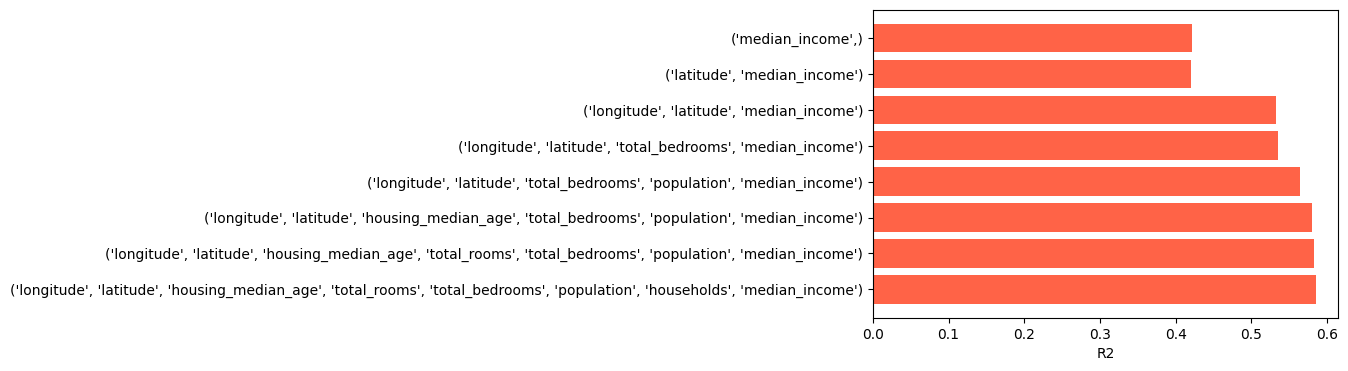

time: 220 ms (started: 2025-02-12 22:29:21 +00:00)


In [ ]:
# Bar plot
fig, ax = plt.subplots(figsize=(6,4))
y_pos = np.arange(len(sbs_results))
ax.barh(y_pos, sbs_results['avg_score'], color='tomato')
ax.set_yticks(y_pos)
ax.set_yticklabels(sbs_results['feature_names'])
ax.set_xlabel('R2')
plt.show()

Finalmente, resumimos los features seleccionados por cada estrategia.

In [ ]:
# Comparacion entre EFS, SFS, anyd SBS
print('Mejor subconjunto con EFS:', efs.best_feature_names_)
print('Mejor subconjunto con SFS:', sfs.k_feature_names_)
print('Mejor subconjunto con SBS:', sbs.k_feature_names_)

Mejor subconjunto con EFS: ('longitude', 'latitude', 'housing_median_age', 'median_income')
Mejor subconjunto con SFS: ('housing_median_age', 'total_rooms', 'total_bedrooms', 'median_income')
Mejor subconjunto con SBS: ('longitude', 'latitude', 'total_bedrooms', 'median_income')
time: 8.47 ms (started: 2025-02-12 22:29:21 +00:00)


### **Recursive Feature Elimination**

Es una optimización greedy para obtener el mejor subconjunto de features. En forma repetida crea modelos de ML y mantiene los features de mejor y peor performance para cada iteración. El proximo modelo se construye con los features restantes, hasta que se agotan todos los features. Finalmente, se hace un ranking de los features en base a su orden de eliminación.

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(model, n_features_to_select=4, step=1)
rfe = rfe.fit(X, y)

print(rfe.support_)
pd.DataFrame(rfe.support_,index=X.columns,columns=['rank']) # Muestra los features considerados importantes (rank = True)

[ True  True  True False False False False  True]


rank
longitude            True
latitude             True
housing_median_age   True
total_rooms         False
total_bedrooms      False
population          False
households          False
median_income        True

time: 41.6 ms (started: 2025-02-12 22:29:21 +00:00)




---

